# Dense neural network

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Data preparation

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape # 28*28 pixels

(60000, 28, 28)

In [5]:
train_labels # memorized as integers

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

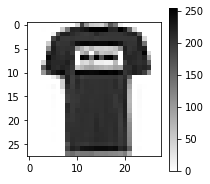

In [7]:
# plot one image and inspect pixel values range

plt.figure(figsize = (3,3))
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# normalize pixel values to be in (0,1)

train_images = train_images / 255.0
test_images = test_images / 255.0

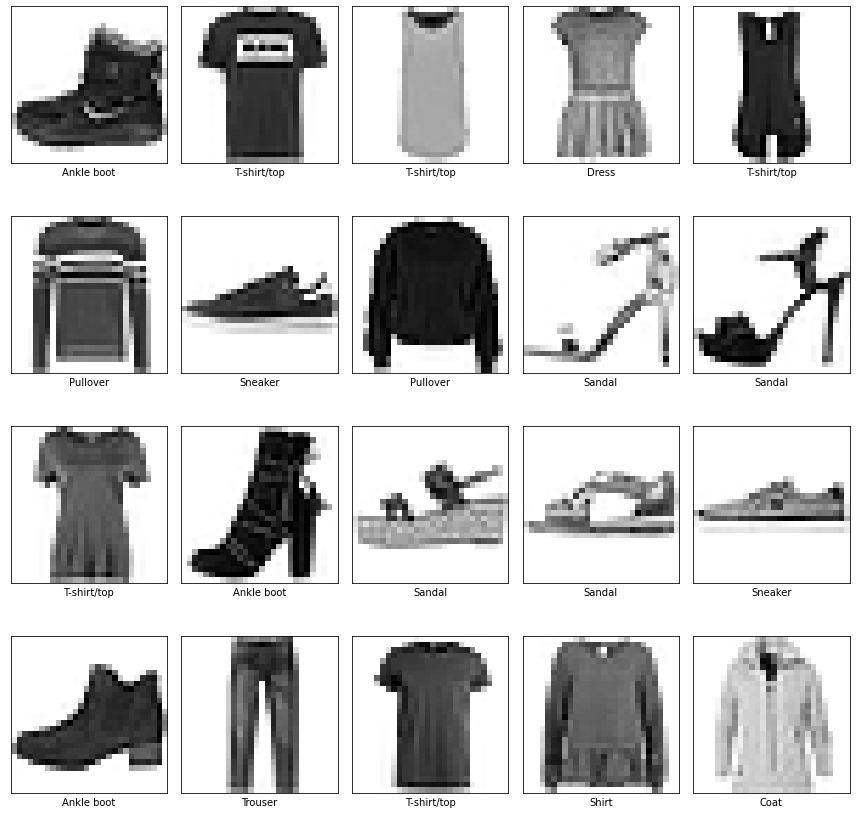

In [9]:
# visualize some images and labels

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()

## Model

## Build the model

### Set up the layers

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

In [11]:
model.compile(optimizer = 'adam', # defines how parameters are updated based on loss function
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

### Train the model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4934 - accuracy: 0.8272
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3364 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3115 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2939 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2783 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2574 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2473 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3297 - accuracy: 0.8862 - 844ms/epoch - 3ms/step

Test accuracy: 0.8862000107765198


In [14]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) # prediction model

predictions = probability_model.predict(test_images)

#print(predictions[0])
f'First image of test set. Real: {class_names[test_labels[0]]} Prediction: {class_names[np.argmax(predictions[0])]}'

313/313 [==============================] - 1s 2ms/step


'First image of test set. Real: Ankle boot Prediction: Ankle boot'

## Visualize predictions

In [15]:
# Visualize predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  color = 'red'
  if predicted_label == true_label:
    color = 'blue'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

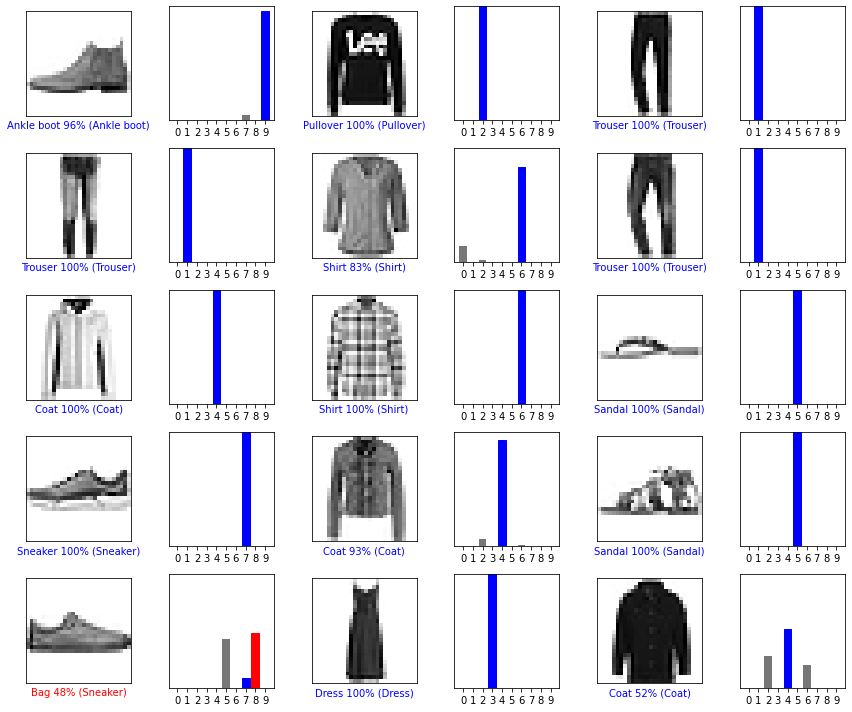

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()